Code python ini digunakan untuk membuat model lstm yang dapat mengidentifikasi bahasa dengan menggunakan data yang berjumlah kecil.


In [0]:
!pip install xlsxwriter

     |████████████████████████████████| 143kB 5.0MB/s 


In [0]:
import numpy as np
import pandas as pd 
from keras import initializers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
import xlsxwriter
from keras.models import load_model

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Total Data : 10000
sunda : 5000
bukan sunda : 5000


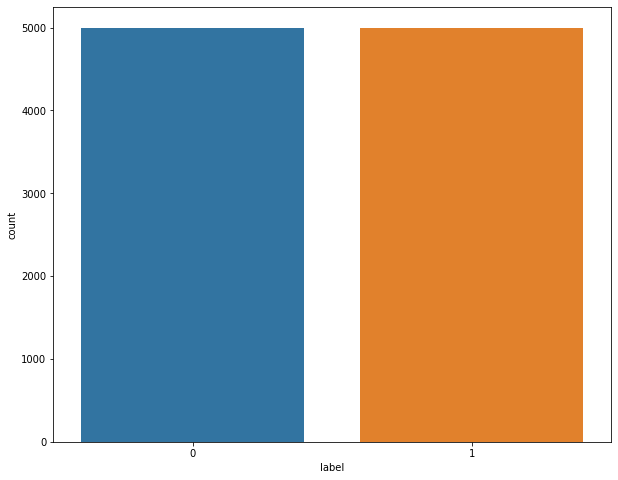

In [0]:
data = pd.read_excel('/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/DATASET/Psoude Label sunda.xlsx')
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)

indo = data.loc[data['label'] == 0, 'Text'].copy().reset_index(drop=True)
jawa = data.loc[data['label'] == 1, 'Text'].copy().reset_index(drop=True)


print("Total Data :", len(data))
print("sunda :", len(indo))
print("bukan sunda :", len(jawa))

plt.figure(figsize=(10,8))
sns.countplot(x='label', data=data)
plt.show()

In [0]:
def get_model(X, Y):
    model = Sequential() 
    model.add(Embedding(input_dim = vocab, output_dim = 128, input_length = maxlen, embeddings_initializer = initializer))
    #model.add(Dropout(0.9))
    model.add(LSTM(128, recurrent_initializer = initializer, kernel_initializer = initializer))
    model.add(Dropout(0.4))
    model.add(Dense(2, activation='sigmoid', kernel_initializer = initializer)) 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    
    return model

def evaluation(model, X, Y):
    Y_pred = model.predict(X)
    Y_pred_class = np.argmax(Y_pred, axis=1)
    Y_act = Y
    
    acc = accuracy_score(Y_act, Y_pred_class)
    
    return acc

In [0]:
text = data['Text'].values
label = data['label'].values

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

vocab = max([len(tokenizer.word_index)]) + 1 # kamus kata 
maxlen = max([len(i.split()) for i in text]) # panjang kalimat
batch_size = 32 # penentuan jumlah sampel yang ditraining pada tiap epoch
num_epochs = 100 # banyak iterasi pada saat training model 
initializer = initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=2) # mengatur angka random weigth

In [0]:
#Data Train
X = tokenizer.texts_to_sequences(text)
X = pad_sequences(X, maxlen=maxlen)
Y = to_categorical(label, num_classes = 2)

#Y = pd.get_dummies(data['label']).values

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.01, random_state = 42, shuffle= True)
#print(X_train.shape,Y_train.shape)
#print(X_test.shape,Y_test.shape)


In [0]:
model = get_model(X, Y)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 90, 128)           3294976   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 3,426,818
Trainable params: 3,426,818
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.fit(X, Y, batch_size=batch_size, epochs=num_epochs, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/100
10000/10000 [==============================] - 48s 5ms/step - loss: 0.1568 - accuracy: 0.9527
Epoch 2/100
10000/10000 [==============================] - 47s 5ms/step - loss: 0.0040 - accuracy: 0.9998
Epoch 3/100
10000/10000 [==============================] - 47s 5ms/step - loss: 0.0020 - accuracy: 0.9997
Epoch 4/100
10000/10000 [==============================] - 47s 5ms/step - loss: 0.0017 - accuracy: 0.9997
Epoch 5/100
10000/10000 [==============================] - 47s 5ms/step - loss: 0.0014 - accuracy: 0.9995
Epoch 6/100
10000/10000 [==============================] - 47s 5ms/step - loss: 8.7065e-04 - accuracy: 0.9998
Epoch 7/100
10000/10000 [==============================] - 47s 5ms/step - loss: 9.3145e-04 - accuracy: 0.9997
Epoch 8/100
10000/10000 [==============================] - 53s 5ms/step - loss: 6.6321e-04 - accuracy: 0.9998
Epoch 9/100
10000/10000 [==============================] - 48s 5ms/step - loss: 6.5516e-04 - accuracy: 0.9997
Epoch 10/100
10000/10000 [====

In [0]:
#acc = evaluation(model, X, label)
accr = model.evaluate(X,Y)
print('Test set blstm\n  Loss: {:0.10f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

#print("Accuracy: %.2f" % (accr*100), "%")

4000/4000 [==============================] - 3s 759us/step
Test set blstm
  Loss: 0.0000037927
  Accuracy: 1.000


In [0]:
acc = evaluation(model, X, label)
print("Accuracy: %.2f" % (acc*100), "%")

Accuracy: 99.98 %


In [0]:
model.save('/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/CODE/pseudo/pseudo_labeling v6 sunda.h5')

## **Labeling Data**

In [0]:
unlabeled = pd.read_excel("/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/DATASET/indo-jawa-sunda unlabel.xlsx")
unlabeled.replace('', np.nan, inplace=True)
unlabeled.dropna(inplace=True)

In [0]:
un_text = unlabeled['text'].values
text1 = tokenizer.texts_to_sequences(un_text)
text1 = pad_sequences(text1, maxlen=maxlen)

In [0]:
pred_label = model.predict(text1)
label1= np.argmax(pred_label, axis = 1)

In [0]:
workbook = xlsxwriter.Workbook('/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/DATASET/indo-jawa-sunda unlabel label sunda.xlsx')
worksheet = workbook.add_worksheet()

row = 0
col = 0

rowHeaders = ['text', 'label']
worksheet.write_row(row, col,  tuple(rowHeaders))


for i in un_text:
    tweet = i
    rowValues = [tweet]
    row += 1
    worksheet.write_row(row, col, tuple(rowValues))

row = 0
for l in label1:
    label = l
    rowValues = [label]
    row += 1 
    worksheet.write_row(row, col + 1, tuple(rowValues))

workbook.close()

# **Retrained Model**

In [0]:
excel_names = ["/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/DATASET/Psoude Label sunda.xlsx", "/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/DATASET/indo-jawa-sunda unlabel label sunda.xlsx"]
excels = [pd.ExcelFile(name) for name in excel_names]

# ubah ke data frame 
# hapus header pertama, yang merupakan judul kolom
frames = [x.parse(x.sheet_names[0], header=None,index_col=None) for x in excels]
frames[1:] = [df[1:] for df in frames[1:]]

# menggabungkan dataframe
combined = pd.concat(frames)

# tulis/save ke file baru 
combined.to_excel("/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/DATASET/gabungan pseude label sunda-indo jawa sunda unlabel label sunda.xlsx", header=False, index=False)

In [0]:
data = pd.read_excel("/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/DATASET/gabungan pseude label sunda-indo jawa sunda unlabel label sunda.xlsx")

data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)

Total Data : 351419
sunda : 108701
bukan sunda : 242718


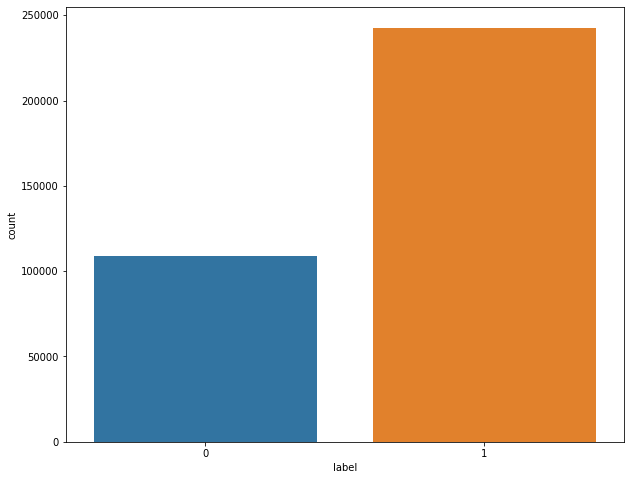

In [0]:
indo = data.loc[data['label'] == 0, 'Text'].copy().reset_index(drop=True)
bukanindo = data.loc[data['label'] == 1, 'Text'].copy().reset_index(drop=True)
print("Total Data :", len(data))
print("sunda :", len(indo))
print("bukan sunda :", len(bukanindo))

plt.figure(figsize=(10,8))
sns.countplot(x='label', data=data)
plt.show()

In [0]:
text2 = data['Text'].values
label2 = data['label'].values

In [0]:
print(vocab)

132210


In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text2)

vocab = max([len(tokenizer.word_index)]) + 1 # kamus kata 
maxlen = max([len(i.split()) for i in text2]) # panjang kalimat
batch_size = 32 # penentuan jumlah sampel yang ditraining pada tiap epoch
num_epochs = 20 # banyak iterasi pada saat training model 
initializer = initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=2) # mengatur angka random weigth

In [0]:
data_train, data_test, label_train, label_test = train_test_split(text2, label2, test_size = 0.33, random_state = 42)
data_train, data_val, label_train, label_val = train_test_split(data_train, label_train, test_size = 0.33, random_state = 42)


In [0]:
X_train = tokenizer.texts_to_sequences(data_train)
X_train = pad_sequences(X_train, maxlen=maxlen)
Y_train = to_categorical(label_train, num_classes = 2)

print('Shape of data tensor:', X_train.shape)


X_test = tokenizer.texts_to_sequences(data_test)
X_test = pad_sequences(X_test, maxlen=maxlen)
Y_test = to_categorical(label_test, num_classes = 2)
print('Shape of data tensor:', X_test.shape)


X_val = tokenizer.texts_to_sequences(data_val)
X_val = pad_sequences(X_val, maxlen=maxlen)
Y_val = to_categorical(label_val, num_classes = 2)

print('Shape of data tensor:', X_val.shape)

Shape of data tensor: (157751, 97)
Shape of data tensor: (115969, 97)
Shape of data tensor: (77699, 97)


In [0]:
model.summary()

NameError: ignored

In [0]:
model = Sequential() 
model.add(Embedding(input_dim = vocab, output_dim = 128, input_length = maxlen, embeddings_initializer = initializer))
#model.add(Dropout(0.9))
model.add(LSTM(128, recurrent_initializer = initializer, kernel_initializer = initializer))
model.add(Dropout(0.4))
model.add(Dense(2, activation='sigmoid', kernel_initializer = initializer)) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 97, 128)           16922880  
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 17,054,722
Trainable params: 17,054,722
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# training model
from tensorflow.python.keras.callbacks import EarlyStopping

history = model.fit(X_train, Y_train, batch_size=128, epochs=num_epochs, verbose=1, validation_data=(X_val, Y_val) ,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001, restore_best_weights = True)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 157751 samples, validate on 77699 samples
Epoch 1/20
157751/157751 [==============================] - 818s 5ms/step - loss: 0.0446 - accuracy: 0.9859 - val_loss: 0.0181 - val_accuracy: 0.9933
Epoch 2/20
157751/157751 [==============================] - 815s 5ms/step - loss: 0.0061 - accuracy: 0.9979 - val_loss: 0.0202 - val_accuracy: 0.9934
Epoch 3/20
157751/157751 [==============================] - 821s 5ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0233 - val_accuracy: 0.9936
Epoch 4/20
157751/157751 [==============================] - 820s 5ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0305 - val_accuracy: 0.9930


In [0]:
model.save('/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/CODE/pseudo/pseudo_labeling v7 sunda.h5')

In [0]:
acc_train = evaluation(model, X_train, label_train)
print("Train Accuracy: %.2f" % (acc_train*100), "%")

acc_test = evaluation(model, X_test, label_test)
print("Test Accuracy: %.2f" % (acc_test*100), "%")

Train Accuracy: 99.80 %
Test Accuracy: 99.31 %
